# Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pickle

# Load the dataset

In [2]:
# Load the stock prices dataset (update path as needed)
df = pd.read_csv('/kaggle/input/stock-prices/2) Stock Prices Data Set.csv') 

# Step 1: Inspect dataset

In [3]:
print("Dataset Head:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nDataset Shape:\n", df.shape)

Dataset Head:
   symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391

Missing Values:
 symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

Data Types:
 symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

Dataset Shape:
 (497472, 7)


# Step 2: Preprocess data

In [4]:
# Drop non-numerical columns (symbol, date)
df = df.drop(['symbol', 'date'], axis=1)

In [5]:
# Handle missing values with median
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)

print("\nMissing Values After:\n", df.isnull().sum())


Missing Values After:
 open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [6]:
# Define features and target
numerical_cols = ['open', 'high', 'low', 'volume']
X = df[numerical_cols]
y = df['close']

In [7]:
# Standardize features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=numerical_cols)

In [8]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (397977, 4) (397977,)
Testing set shape: (99495, 4) (99495,)


# Step 3: Simple Linear Regression with one feature (open)

In [9]:
X_train_open = X_train[['open']]
X_test_open = X_test[['open']]

# Train model
model_open = LinearRegression()
model_open.fit(X_train_open, y_train)

# Predict
y_pred_open = model_open.predict(X_test_open)

# Evaluate
mse_open = mean_squared_error(y_test, y_pred_open)
r2_open = r2_score(y_test, y_pred_open)
print("\nSingle Feature (open) Results:")
print("Mean Squared Error (MSE):", mse_open)
print("R² Score:", r2_open)
print("Coefficient (open):", model_open.coef_[0])
print("Intercept:", model_open.intercept_)


Single Feature (open) Results:
Mean Squared Error (MSE): 2.641767815374782
R² Score: 0.9997451727947394
Coefficient (open): 101.46530900725124
Intercept: 86.36985303900441


# Step 4: Linear Regression with all features

In [10]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)

# Evaluate
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)
print("\nAll Features Results:")
print("Mean Squared Error (MSE):", mse_all)
print("R² Score:", r2_all)


All Features Results:
Mean Squared Error (MSE): 0.5216151452303575
R² Score: 0.9999496845525534


# Step 5: Visualize predicted vs actual prices (open model)

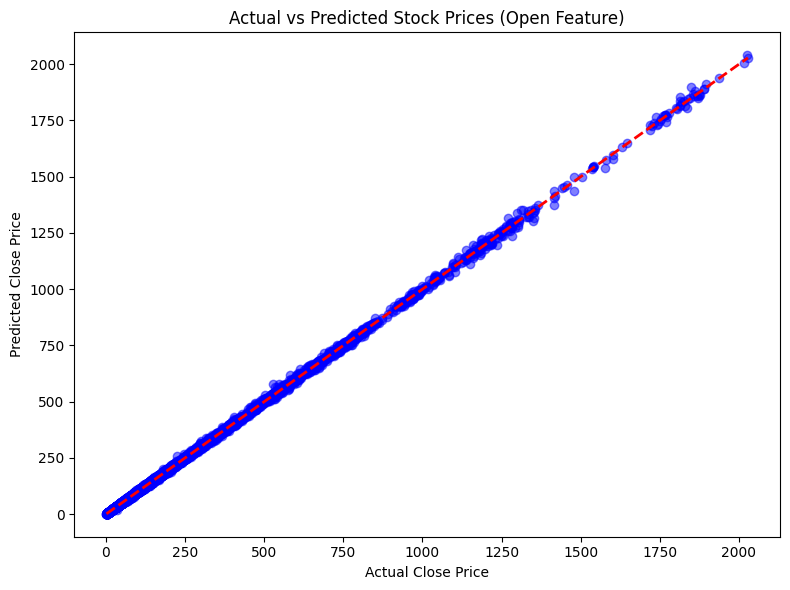

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_open, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Stock Prices (Open Feature)')
plt.tight_layout()
plt.savefig('/kaggle/working/pred_vs_actual_open.png')
plt.show()

# Step 6: Save model and predictions

In [12]:
with open('/kaggle/working/linear_model_open.pkl', 'wb') as f:
    pickle.dump(model_open, f)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_open}).to_csv('/kaggle/working/predictions_open.csv', index=False)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_all}).to_csv('/kaggle/working/predictions_all.csv', index=False)

print("\nSaved: linear_model_open.pkl, predictions_open.csv, predictions_all.csv, pred_vs_actual_open.png")


Saved: linear_model_open.pkl, predictions_open.csv, predictions_all.csv, pred_vs_actual_open.png
